In [14]:
import json
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.corpus import wordnet
files = glob.glob(r"C://Pravo_gov_ru_txts///*.txt")

In [15]:
full_corpus = ''
for file in files:
    with open(file, 'r', encoding='cp1251') as fl:
        data = fl.readlines()
    full_corpus += ' ' + ' '.join(data).lower().strip()
    

In [5]:
stop_words = set(stopwords.words('russian'))
    
def rem_stopwords(text):
    res = ''
    for word in word_tokenize(text):
        if word not in stop_words:
            res +=  word + ' '
    return res

In [16]:
full_corpus = rem_stopwords(full_corpus)

In [1]:
def wordcloud_texts(texts):
  wordcloud = WordCloud(
    width=1980,height=1080,
    background_color='white', colormap='Set2'
  ).generate(
    ' '.join(texts)
  )
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
  return None

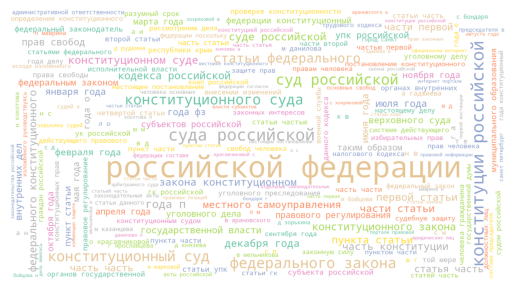

In [17]:
wordcloud_texts(full_corpus.split())

In [21]:
import nltk
import pandas as pd
from nltk.util import ngrams

def ngrams_by_scores(lemmas, ngram_count: int = 10, ngram_level: int = 2):
  """ 
    Статистика по нграммам относительно рейтинга (score) комментариев

    lemmas: pd.DataFrame
      - Датафрейм с комментариями
    comments_col: str
      - Столбец с комментариями
    ngram_count: int
      - Количество популярных биграмм
    ngram_level: int
      - Количество нграмм 
  """

  # построение распределения слов относительно скоров

  most_common_nrams = nltk.FreqDist(
      [
          f'{el[0]} {el[1]}' if ngram_level == 2 
          else f'{el[0]} {el[1]} {el[2]}'
          for el in ngrams(
            lemmas.split(), 
            ngram_level
          )
      ]
    ).most_common()
  most_common_nrams = list(filter(
      lambda ngram_: ngram_[1] <= 500, most_common_nrams
    ))[:ngram_count]
  print(f'ngram: {most_common_nrams}')
  words_df = pd.DataFrame(most_common_nrams, columns=['ngram','frequency'])
  palette =  [(x/(ngram_count), x/(ngram_count+2), 0.8) for x in range(words_df.shape[0])]
  words_df.plot.bar(
      y='frequency', x='ngram', color=palette, 
    )
  return None

ngram: [('мандата ,', 500), ('пункта 10', 500), ('ситуаций ,', 500), ('. возложение', 500), (', имеющее', 500), ('жилищными комиссиями', 500), ('транспорта ,', 500), ('уставом муниципального', 500), ('законом 28', 500), ('= [', 500), ('закон республики', 500), ('жизнь ,', 500), ('переходный период', 500), ('смысл пункта', 500), ('родниковского сельского', 500), ('гражданско-правового сообщества', 500), ('открывшимся новым', 500), ('избирательным округам', 500), ('конкретное дело', 499), ('— ,', 499)]


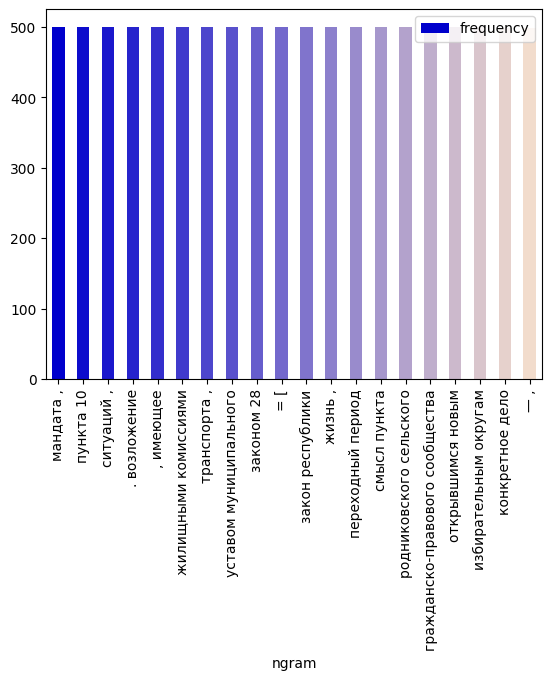

In [22]:
ngrams_by_scores(full_corpus, ngram_count=20)

ngram: [('лицо , которое', 500), ('жалобы граждан нарушение', 500), ('» , которым', 500), (') 54 (', 500), ('удовлетворении заявленных требований', 500), ('федеральным законом 28', 500), (', данном случае', 500), ('вновь открывшимся новым', 500), ('открывшимся новым обстоятельствам', 500), ('российской федерации гарантируется', 499), (', приводящая различиям', 499), ('приводящая различиям правах', 499), ('депутатских мандатов внутри', 499), (', статьям 7', 499), ('федерации , должны', 499), ('занятие педагогической деятельностью', 499), ('государственной , муниципальной', 498), ('июня 1998 года', 498), ('предусмотренных законом ,', 498), ('4 статьи 170', 498)]


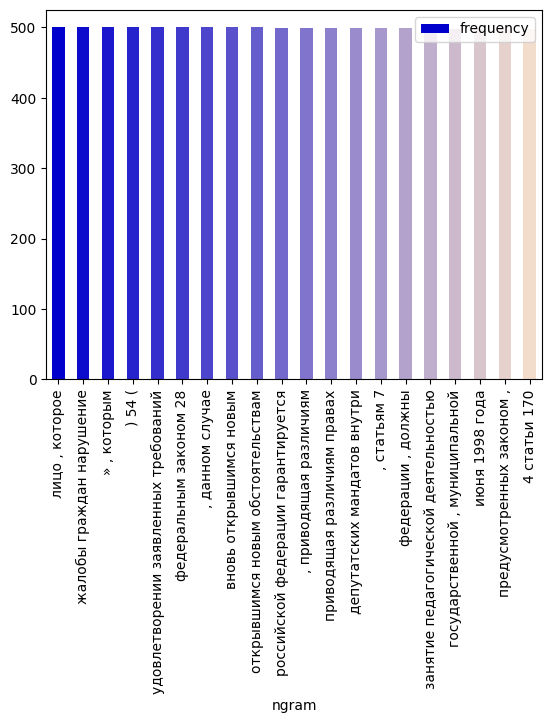

In [23]:
ngrams_by_scores(full_corpus, ngram_count=20, ngram_level=3)

In [27]:
pattern = re.compile(r"|\||\.|\,|\!|\?|\)|\(+|\-|@|mail|ru|\'|\_|\`|", re.IGNORECASE)
def remove_garbage(txt):
    txt= re.sub(pattern, '', txt).strip()
    return txt

In [29]:
full_corpus = remove_garbage(full_corpus)

ngram: [('пункта 10', 500), ('жилищными комиссиями', 500), ('лицо которое', 500), ('4 37', 500), ('уставом муниципального', 500), ('законом 28', 500), ('38 части', 500), ('6 конституции', 500), ('закон республики', 500), ('переходный период', 500), ('смысл пункта', 500), ('родниковского сельского', 500), ('гражданскоправового сообщества', 500), ('избирательным округам', 500), ('133 трудового', 500), ('конкретное дело', 499), ('судопроизводства основе', 499), ('мере распространяется', 499), ('законным обоснованным', 499), ('федерации гарантируется', 499)]


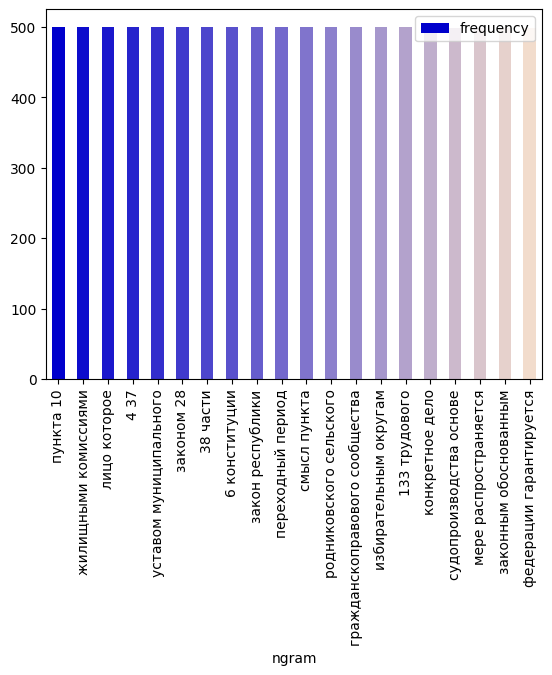

In [30]:
ngrams_by_scores(full_corpus, ngram_count=20, ngram_level=2)

ngram: [('4 37 часть', 500), ('жалобы граждан нарушение', 500), ('статья 35 часть', 500), ('удовлетворении заявленных требований', 500), ('федеральным законом 28', 500), ('пункта статьи 19', 500), ('6 конституции российской', 500), ('133 трудового кодекса', 500), ('судебной защиты права', 499), ('российской федерации гарантируется', 499), ('приводящая различиям правах', 499), ('российской федерации обязанности', 499), ('депутатских мандатов внутри', 499), ('человека гражданина числе', 499), ('федерации статьям 7', 499), ('пункта статьи 6', 499), ('занятие педагогической деятельностью', 499), ('июня 1998 года', 498), ('4 статьи 170', 498), ('оно отвечает требованиям', 498)]


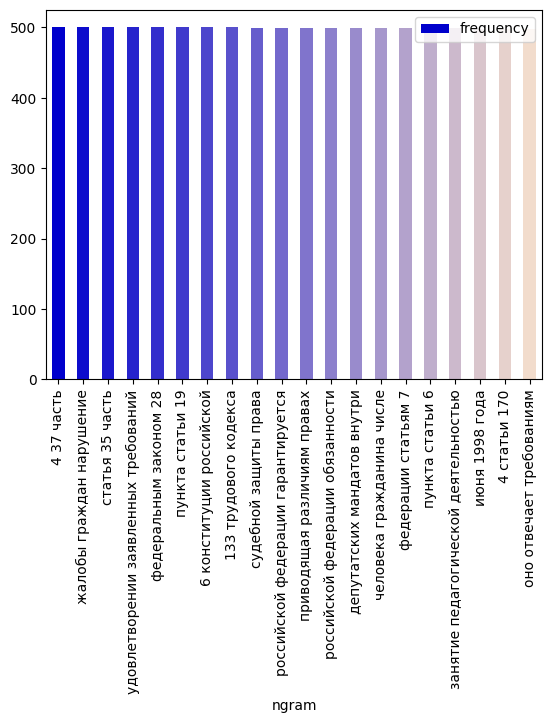

In [31]:
ngrams_by_scores(full_corpus, ngram_count=20, ngram_level=3)